In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
RANDOM_SEED = 0x0

# TASK 1. Metrics (4 Points): 
In this task you will compute some standard quality measures like Precision, Recall and F-Score for an artificial dataset.

First, we generate some artificial data for a classification task and take a look at it.

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=500, centers=4, random_state=RANDOM_SEED, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

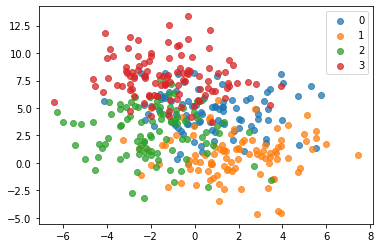

In [6]:
for target_class in np.unique(y):
    plt.scatter(X_train[y_train == target_class, 0], X_train[y_train == target_class, 1], alpha=0.75,
                label=target_class)
plt.legend()
plt.show()

As we can see, the classes are not easy distinguishable. That is not an easy task for the model. 
Nevertheless, let's apply a Logistic Regression Model and predict `y` values. 

In [7]:
log_reg = LogisticRegression(random_state=RANDOM_SEED).fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)

### Task 1a. Create and visualise the confusion matrix that describes the results:

1. Create confusion matrix. Use can use `sklearn.metrics.confusion_matrix` functions.
2. Display the confusion matrix of the Logistic Regression Model with `seaborn.heatmap`. Include the numbers of samples in each cell of the heatmap.

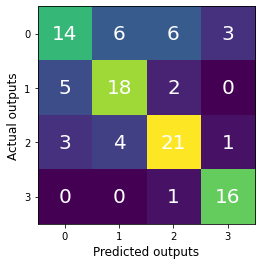

              precision    recall  f1-score   support

           0       0.64      0.48      0.55        29
           1       0.64      0.72      0.68        25
           2       0.70      0.72      0.71        29
           3       0.80      0.94      0.86        17

    accuracy                           0.69       100
   macro avg       0.69      0.72      0.70       100
weighted avg       0.68      0.69      0.68       100



In [8]:
from sklearn.metrics import confusion_matrix, classification_report


def visualize_confusion_matrix(matrix: np.ndarray):
    size = matrix.shape[0]

    matrix_fig, matrix_ax = plt.subplots(figsize=(size, size))
    matrix_ax.imshow(matrix)
    matrix_ax.grid(False)
    matrix_ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
    matrix_ax.set_ylabel('Actual outputs', fontsize=12, color='black')
    matrix_ax.xaxis.set(ticks=range(size))
    matrix_ax.yaxis.set(ticks=range(size))
    matrix_ax.set_ylim(size - 1 + 0.5, 0 - 0.5)
    for i in range(size):
        for j in range(size):
            matrix_ax.text(j, i, matrix[i, j], ha='center', va='center', color='white', size=20)
    plt.show()


conf_matrix = confusion_matrix(y_test, y_test_pred)
visualize_confusion_matrix(conf_matrix)
print(classification_report(y_test, y_test_pred))

### Task 1b. Create functions that calculate Precision, Recall and F1-Score. 
1. Implement your own functions for calculating Precision, Recall and F1-Score. Don't use any of the existing libraries for this.
2. Apply them on the example above for the class `0`.

In [9]:
def precision(class_of_interest, confusion_matrix_test: np.ndarray):
    true_positives = confusion_matrix_test[class_of_interest, class_of_interest]
    false_positives = confusion_matrix_test[:, class_of_interest].sum() - true_positives
    return true_positives / (true_positives + false_positives)


def recall(class_of_interest, confusion_matrix_test):
    true_positives = confusion_matrix_test[class_of_interest, class_of_interest]
    false_negatives = confusion_matrix_test[class_of_interest].sum() - true_positives
    return true_positives / (true_positives + false_negatives)


def f1_score(precision_value, recall_value):
    return 2 * (precision_value * recall_value /
                (precision_value + recall_value))

In [10]:
precision_value = precision(0, conf_matrix)
recall_value = recall(0, conf_matrix)
f1_score_test = f1_score(precision_value, recall_value)

print(f"Precision: {precision_value}")
print(f"Recall: {recall_value}")
print(f"F1-Score: {f1_score_test}")

Precision: 0.6363636363636364
Recall: 0.4827586206896552
F1-Score: 0.5490196078431373


### Task 1c. Check your results 
Use the function `classification_report` of `sklearn.metrics` to compare their results to your own implementation

In [11]:
# Already done before.

## 📢 **HAND-IN** 📢: Post following results you got in this task:

1. Confusion matrix from task 1a
2. Precision, Recall and F1-Score from task 1b



# TASK 2. Cross Validation (1 point)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns

sns.set()  # just the theme

In this task, we familiarize ourselves with how different types of Cross Validation actually partition the data. 

Run the following code and inspect the graphs that show how the data was split for different runs. Full code source can be found [here](https://https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)

Note: the bar "class" on the graphs shows the samples of 3 classes. First, all samples of class 0 are listed (in light blue color), then all samples of class 1 are shown (yellow) and, lastly, all samples of class 2 are following (brown).

In [13]:
from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedShuffleSplit
)
from matplotlib.patches import Patch

# first, generate dummy data
n_points = 100
rng = np.random.RandomState(RANDOM_SEED)
X = rng.randn(100, 10)
# we have 10% of the data belonging to class 0, 30% - to class 1 and 60% to class 2
# first come all the data samples that belong to class 0, following by the samples of class 1 and then of class 2
percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ind] * int(100 * perc) for ind, perc in enumerate(percentiles_classes)])

# color settings for graphs
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

n_splits = 5

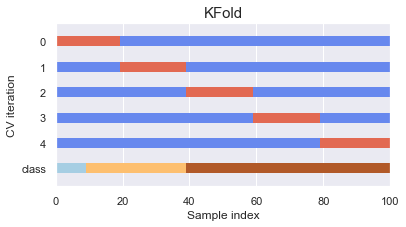

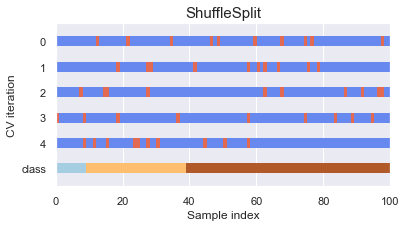

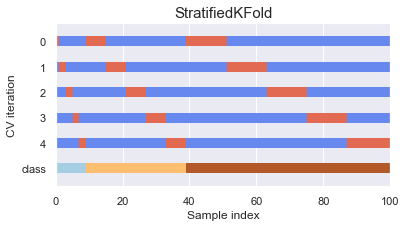

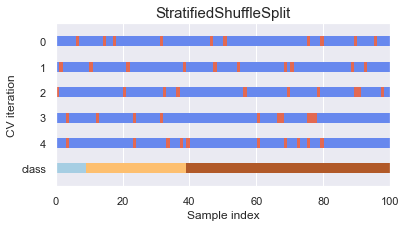

In [14]:
cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit]


def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1.0
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )
    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, ax, n_splits)



## 📢 **HAND-IN** 📢: Answer following question in Moodle:

Try to explain in your own words (1-2 lines) how ShuffleSplit splits the data. 



#3. Cross Validation and Imbalanced Data (5 points)
In this task we are working with the **Default of Credit Card Clients Dataset**. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. More info about the dataset can be found [here](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset).

The target variable is:

- `default.payment.next.month`: Default payment (1=yes, 0=no)

Default payment means a missed payment. So, the target variable shows whether a person will miss his or her Credit Card Payment (=1) or will pay it back (=0).

The predictor features are:
*   ID: ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
*   SEX:0, SEX:1: Binary variables for gender (0=male, 1=female)
*   EDUCATION:0-EDUCATION:5: Binary variables for education (0=graduate school, 1=university, 2=high school, 3=others, 4=unknown, 5=unknown)
*   MARRIAGE:0-MARRIAGE:2: Binary variables for Marital status (0=married, 1=single, 2=others)
*   AGE: Age in years
*   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   PAY_2: Repayment status in August, 2005 (scale same as above)
*   PAY_3: Repayment status in July, 2005 (scale same as above)
*   PAY_4: Repayment status in June, 2005 (scale same as above)
*   PAY_5: Repayment status in May, 2005 (scale same as above)
*   PAY_6: Repayment status in April, 2005 (scale same as above)
*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


In [15]:
# install datasets
!pip install datasets

You should consider upgrading via the 'c:\users\gerom\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


First, we load and inspect the data.

In [16]:
from datasets import load_dataset

dataset = load_dataset("imodels/credit-card")
df_train = pd.DataFrame(dataset['train'])
X_train = df_train.drop(columns=['default.payment.next.month'])
y_train = df_train['default.payment.next.month'].values
print(X_train.head())

df_test = pd.DataFrame(dataset['test'])
X_test = df_test.drop(columns=['default.payment.next.month'])
y_test = df_test['default.payment.next.month'].values

Using custom data configuration imodels--credit-card-fc59432e6db31dca
Found cached dataset csv (C:/Users/gerom/.cache/huggingface/datasets/imodels___csv/imodels--credit-card-fc59432e6db31dca/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/2 [00:00<?, ?it/s]

   limit_bal   age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0    80000.0  24.0    0.0    0.0    0.0    0.0    0.0    0.0    75125.0   
1    30000.0  28.0    0.0    0.0    0.0    0.0    0.0    0.0    29242.0   
2   180000.0  44.0    0.0    0.0   -1.0   -1.0   -1.0   -1.0    20916.0   
3    60000.0  25.0    0.0    0.0    0.0    0.0    0.0    0.0    58839.0   
4   130000.0  25.0    0.0    0.0    0.0    0.0    0.0    0.0   111587.0   

   bill_amt2  ...  education:1  education:2  education:3  education:4  \
0    77353.0  ...          0.0          1.0          0.0          0.0   
1    29507.0  ...          0.0          1.0          0.0          0.0   
2        0.0  ...          0.0          0.0          0.0          0.0   
3    53235.0  ...          1.0          0.0          0.0          0.0   
4   112348.0  ...          0.0          1.0          0.0          0.0   

   education:5  education:6  marriage:0  marriage:1  marriage:2  marriage:3  
0          0.0          0.0     

In the following, we want to explore how to handle highly imbalanced data. "Unfortunately", the dataset is currently not very imbalenced. For this reason we implement an auxiliary function that deletes X% of all samples of class 1. Applying this function several times will make our data more and more imbalanced

In [17]:
def delete_random_samples_of_class_1(samples_X, samples_y, percentage=90):
    # find samples of class 1
    y1_indices = np.argwhere(samples_y == 1)
    y1_indices = y1_indices.reshape((y1_indices.shape[0],))
    sampled_indices = np.random.choice(y1_indices, int(percentage / 100 * len(y1_indices)), replace=False)
    # delete randomly chosen samples of class 1
    new_samples_X = np.delete(samples_X.values, sampled_indices, axis=0)
    new_samples_y = np.delete(samples_y, sampled_indices)
    return new_samples_X, new_samples_y

### 3a. Inspect target variable and apply function that increases the imbalance of the dataset
1. Check how many samples of each class are present in the dataset
2. Apply `delete_random_samples`
3. Check again how many samples of each class are present in the dataset

In [18]:
new_x_train, new_y_train = delete_random_samples_of_class_1(X_train, y_train)

default_payments_before = np.count_nonzero(y_train == 1)
non_default_payments_before = np.count_nonzero(y_train == 0)

default_payments_after = np.count_nonzero(new_y_train == 1)
non_default_payments_after = np.count_nonzero(new_y_train == 0)

print(f"Ratio of defaults before random removal: {100 / non_default_payments_before * default_payments_before}%")
print(f"Ratio of defaults after random removal: {100 / non_default_payments_after * default_payments_after}%")


Ratio of defaults before random removal: 28.500294479841514%
Ratio of defaults after random removal: 2.8537773732398137%


### 3b. Standardization the data
Apply Standardization to the data. You could either use the functions you created for the previous labs or `StandardScaler` from the `sklearn` library.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_x_train = scaler.fit_transform(new_x_train)
print(new_x_train.mean())
print(new_x_train.std())

-9.998014296499762e-18
0.9999999999999929


### 3c. Logistic regression and Cross Validation
We now apply Logistic regression and one of the Cross Validation techniques from the example above to the data in order to predict `default.payment.next.month`. Proceed as follows:
1. Set `n_splits` to the number of splits that results in 20% of validation data in each split, set maximum iterations to `500` and random state to `RANDOM_SEED`.
2. Create and train the model
3. Apply the model in order to predict target variable of the test set. 
4. Calculate Accuracy, Precision (macro) and Recall (macro) for the predicted values.
5. Generate and visualize the confusion matrix of the test set.


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



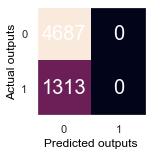

In [26]:
from sklearn.linear_model import LogisticRegressionCV


def logistic_regression_CV(n_splits, cv_technique, class_weight = None):
    model = LogisticRegressionCV(
        cv=cv_technique(n_splits),
        max_iter=500,
        random_state=RANDOM_SEED,
        class_weight=class_weight
    )
    model.fit(X_train, y_train)
    return model.predict(X_test)


y_pred = logistic_regression_CV(5, StratifiedKFold)
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
visualize_confusion_matrix(conf_matrix)

In [21]:
# def return_statistics(y_true, y_pred):
#     accuracy = ...
#     precision = ...
#     recall = ...
#
#     print(f"Accuracy: {accuracy}")
#     print(f"Precision (macro): {precision}")
#     print(f"Recall (macro): {recall}")

    #visualise confusion matrix

In [22]:
# y_pred = logistic_regression_CV(...)
# return_statistics(y_test, y_pred)

TypeError: logistic_regression_CV() missing 1 required positional argument: 'cv_technique'

### 3d. Handling imbalanced dataset
1. Run the function `logistic_regression_CV` one more time. But this time add parameter `class_weight='balanced'` to the Logistic Regression Model. Adjust the function accordingly. 
2. Visualize the confusion matrix of the test set again.


              precision    recall  f1-score   support

           0       0.87      0.51      0.64      4687
           1       0.29      0.73      0.42      1313

    accuracy                           0.56      6000
   macro avg       0.58      0.62      0.53      6000
weighted avg       0.74      0.56      0.59      6000



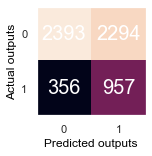

In [27]:
y_pred = logistic_regression_CV(5, StratifiedKFold, 'balanced')  # train logistic regression with class_weight='balanced', use cross-validation as in the 3c

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
visualize_confusion_matrix(conf_matrix)

## 📢 **HAND-IN** 📢: Please hand in the following:

- The confusion matrices of 3c and 3d
- How do you interpret the confusion matrix of 3c?
- What is the major change that happend in 3d?
